In [1]:
import tensorflow as tf

C:\Users\JanU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.4944 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.3745 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.3385 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.3132 - acc: 0.8842
Epoch 5/5
10000/10000 [==============================] - 1s 57us/step


## Improving Computer Vision Accuracy using Convolutions

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

C:\Users\JanU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [2]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0


In [3]:
training_images.shape

(60000, 28, 28, 1)

In [4]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

    The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
    The size of the Convolution, in this case a 3x3 grid
    The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
    In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape=(28,28,1)),  #total 32 filter in thing Layer each is of 3x3
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [7]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 183s 3ms/step - loss: 0.4366 - acc: 0.8411
Epoch 2/5
60000/60000 [==============================] - 224s 4ms/step - loss: 0.2945 - acc: 0.8925 1s - loss: 0.2949 - 
Epoch 3/5
60000/60000 [==============================] - 184s 3ms/step - loss: 0.2496 - acc: 0.9069
Epoch 4/5
60000/60000 [==============================] - 185s 3ms/step - loss: 0.2170 - acc: 0.9191
Epoch 5/5
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1918 - acc: 0.9275


In [9]:
test_loss,test_acc = model.evaluate(test_images, test_labels)
print('Loss', test_loss)
print('Accuracy', test_acc)

10000/10000 [==============================] - 10s 961us/step
Loss 0.2624252135038376
Accuracy 0.9053


## Visualizing the Convolutions and Pooling

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


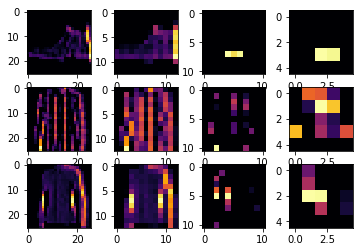

In [12]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Just try some other Convulution model with diferent no.of filter. input shapres, epochs

In [14]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.9.0
11493376/11490434 [==============================] - 249s 22us/step
Epoch 1/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1621 - acc: 0.9512
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0548 - acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0353 - acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0223 - acc: 0.9929
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0178 - acc: 0.9944
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0121 - acc: 0.9961
Epoch 7/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0090 - acc: 0.9970
Epoch 8/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0075 - acc: 0.9975
Epoch 9/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0054 - acc: 0.9983
Epoch 10/10
10000/10000 [